<a href="https://colab.research.google.com/github/Fadelhamkaa/ML_Naive-Bayes_Manual-/blob/main/LP4_Muhammad_Fadel_Hamka_60200122116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_excel('/content/Lokasi Perumahan.xlsx')
print("Dataset:")
print(df)

Dataset:
  Harga Tanah Jarak dai pusat kota Ada angkutan umum Dipilih untuk perumahan
0       Murah                Dekat             Tidak                     Iya
1      Sedang                Dekat             Tidak                     Iya
2       Mahal                Dekat             Tidak                     Iya
3       Mahal                 Jauh             Tidak                   Tidak
4       Mahal               Sedang             Tidak                   Tidak
5      Sedang                 Jauh               Ada                   Tidak
6       Murah                 Jauh               Ada                   Tidak
7       Murah               Sedang             Tidak                     Iya
8       Mahal                 Jauh               Ada                   Tidak
9      Sedang               Sedang               Ada                     Iya


In [2]:
# Encode fitur kategorikal ke nilai numerik
le = LabelEncoder()
encoded_df = df.copy()

for col in encoded_df.columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

print("Dataset setelah encoding:")
print(encoded_df)

Dataset setelah encoding:
   Harga Tanah  Jarak dai pusat kota  Ada angkutan umum  \
0            1                     0                  1   
1            2                     0                  1   
2            0                     0                  1   
3            0                     1                  1   
4            0                     2                  1   
5            2                     1                  0   
6            1                     1                  0   
7            1                     2                  1   
8            0                     1                  0   
9            2                     2                  0   

   Dipilih untuk perumahan  
0                        0  
1                        0  
2                        0  
3                        1  
4                        1  
5                        1  
6                        1  
7                        0  
8                        1  
9                        0  


In [3]:
# Menghitung probabilitas prior
label_counts = encoded_df['Dipilih untuk perumahan'].value_counts()
total_samples = len(encoded_df)
prior_probs = label_counts / total_samples

# Menghitung probabilitas likelihood
feature_probs = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
features = ['Harga Tanah', 'Jarak dai pusat kota', 'Ada angkutan umum']
target = 'Dipilih untuk perumahan'

for feature in features:
    for value in encoded_df[feature].unique():
        for class_value in encoded_df[target].unique():
            num = len(encoded_df[(encoded_df[feature] == value) & (encoded_df[target] == class_value)])
            den = label_counts[class_value]
            feature_probs[feature][value][class_value] = num / den if den != 0 else 0

print("\nProbabilitas Prior:")
print(prior_probs)

print("\nProbabilitas Likelihood:")
for feature in features:
    print(f"\n{feature}:")
    for value in feature_probs[feature]:
        for class_value in feature_probs[feature][value]:
            print(f"P({feature}={value} | Kelas={class_value}) = {feature_probs[feature][value][class_value]:.4f}")


Probabilitas Prior:
Dipilih untuk perumahan
0    0.5
1    0.5
Name: count, dtype: float64

Probabilitas Likelihood:

Harga Tanah:
P(Harga Tanah=1 | Kelas=0) = 0.4000
P(Harga Tanah=1 | Kelas=1) = 0.2000
P(Harga Tanah=2 | Kelas=0) = 0.4000
P(Harga Tanah=2 | Kelas=1) = 0.2000
P(Harga Tanah=0 | Kelas=0) = 0.2000
P(Harga Tanah=0 | Kelas=1) = 0.6000

Jarak dai pusat kota:
P(Jarak dai pusat kota=0 | Kelas=0) = 0.6000
P(Jarak dai pusat kota=0 | Kelas=1) = 0.0000
P(Jarak dai pusat kota=1 | Kelas=0) = 0.0000
P(Jarak dai pusat kota=1 | Kelas=1) = 0.8000
P(Jarak dai pusat kota=2 | Kelas=0) = 0.4000
P(Jarak dai pusat kota=2 | Kelas=1) = 0.2000

Ada angkutan umum:
P(Ada angkutan umum=1 | Kelas=0) = 0.8000
P(Ada angkutan umum=1 | Kelas=1) = 0.4000
P(Ada angkutan umum=0 | Kelas=0) = 0.2000
P(Ada angkutan umum=0 | Kelas=1) = 0.6000


In [4]:
# Fungsi untuk menghitung probabilitas posterior berdasarkan prior dan likelihood
def calculate_posterior(sample, prior_probs, feature_probs):
    posterior_probs = {}
    for class_value in prior_probs.index:
        posterior = prior_probs[class_value]
        for feature, feature_value in sample.items():
            likelihood = feature_probs.get(feature, {}).get(feature_value, {}).get(class_value, 0)
            if likelihood == 0:
                posterior = 0
                break
            posterior *= likelihood
        posterior_probs[class_value] = posterior
    return posterior_probs

In [5]:
import pandas as pd

# Fungsi untuk memprediksi kelas berdasarkan probabilitas posterior
def predict(samples, prior_probs, feature_probs, class_labels):
    for i, sample in enumerate(samples, 1):
        posterior_probs = calculate_posterior(sample, prior_probs, feature_probs)
        print(f"\nPrediksi untuk Sampel {i}:")
        for class_value, posterior in posterior_probs.items():
            print(f"P(Kelas={class_labels[class_value]} | Data) = {posterior:.4f}")
        predicted_class = max(posterior_probs, key=posterior_probs.get)
        print(f"Kelas yang diprediksi: {class_labels[predicted_class]}")

# Data probabilitas likelihood
feature_probs = {
    'Harga Tanah': {
        0: {0: 0.2, 1: 0.6},
        1: {0: 0.4, 1: 0.2},
        2: {0: 0.4, 1: 0.2}
    },
    'Jarak dari pusat kota': {
        0: {0: 0.6, 1: 0.0},
        1: {0: 0.0, 1: 0.8},
        2: {0: 0.4, 1: 0.2}
    },
    'Ada angkutan umum': {
        0: {0: 0.2, 1: 0.6},
        1: {0: 0.8, 1: 0.4}
    }
}

# Probabilitas prior
prior_probs = pd.Series({0: 0.5, 1: 0.5})

# Daftar sampel data baru
sample_data_list = [
    pd.Series({'Harga Tanah': 1, 'Jarak dari pusat kota': 1, 'Ada angkutan umum': 1}),
    pd.Series({'Harga Tanah': 0, 'Jarak dari pusat kota': 0, 'Ada angkutan umum': 0}),
    pd.Series({'Harga Tanah': 0, 'Jarak dari pusat kota': 1, 'Ada angkutan umum': 1})
]

# Pemetaan kelas
class_labels = {0: "Iya", 1: "Tidak"}

# Prediksi
predict(sample_data_list, prior_probs, feature_probs, class_labels)


Prediksi untuk Sampel 1:
P(Kelas=Iya | Data) = 0.0000
P(Kelas=Tidak | Data) = 0.0320
Kelas yang diprediksi: Tidak

Prediksi untuk Sampel 2:
P(Kelas=Iya | Data) = 0.0120
P(Kelas=Tidak | Data) = 0.0000
Kelas yang diprediksi: Iya

Prediksi untuk Sampel 3:
P(Kelas=Iya | Data) = 0.0000
P(Kelas=Tidak | Data) = 0.0960
Kelas yang diprediksi: Tidak


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from collections import defaultdict

# Load dataset
df = pd.read_excel('/content/Lokasi Perumahan.xlsx')
print("Dataset:")
print(df)

# 1. Encode fitur kategorikal ke nilai numerik
le = LabelEncoder()
encoded_df = df.copy()

for col in encoded_df.columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

print("Dataset setelah encoding:")
print(encoded_df)

# Fungsi untuk menghitung probabilitas prior dan likelihood
def calculate_probabilities(X_train, y_train):
    prior_probs = y_train.value_counts(normalize=True)
    feature_probs = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
    for feature in X_train.columns:
        for value in X_train[feature].unique():
            for class_value in y_train.unique():
                num = len(X_train[(X_train[feature] == value) & (y_train == class_value)]) + 1  # Laplace smoothing
                den = y_train.value_counts()[class_value] + len(X_train[feature].unique())  # Adjust denominator
                feature_probs[feature][value][class_value] = num / den if den != 0 else 0
    return prior_probs, feature_probs

# Fungsi untuk menghitung probabilitas posterior berdasarkan prior dan likelihood
def calculate_posterior(sample, prior_probs, feature_probs):
    posterior_probs = {}
    for class_value in prior_probs.index:
        posterior = prior_probs[class_value]
        for feature, feature_value in sample.items():
            likelihood = feature_probs.get(feature, {}).get(feature_value, {}).get(class_value, 0)
            if likelihood == 0:
                posterior = 0
                break
            posterior *= likelihood
        posterior_probs[class_value] = posterior
    return posterior_probs

# Fungsi untuk memprediksi kelas berdasarkan probabilitas posterior
def predict(samples, prior_probs, feature_probs, class_labels):
    predictions = []
    for i, sample in enumerate(samples, 1):
        posterior_probs = calculate_posterior(sample, prior_probs, feature_probs)
        print(f"\nPrediksi untuk Sampel {i}:")
        for class_value, posterior in posterior_probs.items():
            print(f"P(Kelas={class_labels[class_value]} | Data) = {posterior:.4f}")
        predicted_class = max(posterior_probs, key=posterior_probs.get)
        print(f"Kelas yang diprediksi: {class_labels[predicted_class]}")
        predictions.append(predicted_class)
    return predictions

# 2. Split dataset menjadi train dan test dengan proporsi 80/20
features = ['Harga Tanah', 'Jarak dai pusat kota', 'Ada angkutan umum']
target = 'Dipilih untuk perumahan'

X = encoded_df[features]
y = encoded_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# 3. Hitung probabilitas prior dan likelihood dari data training
prior_probs, feature_probs = calculate_probabilities(X_train, y_train)

# 4. Prediksi pada data testing
y_pred = X_test.apply(lambda row: max(calculate_posterior(row, prior_probs, feature_probs),
                                      key=calculate_posterior(row, prior_probs, feature_probs).get), axis=1)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nHasil evaluasi dengan 80% Training dan 20% Testing:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Laporan Klasifikasi:")
print(report)

# 5. Prediksi untuk sampel baru
sample_data_list = [
    pd.Series({'Harga Tanah': 1, 'Jarak dai pusat kota': 1, 'Ada angkutan umum': 1}),
    pd.Series({'Harga Tanah': 0, 'Jarak dai pusat kota': 0, 'Ada angkutan umum': 0}),
    pd.Series({'Harga Tanah': 0, 'Jarak dai pusat kota': 1, 'Ada angkutan umum': 1})
]

# Pemetaan kelas
class_labels = {0: "Iya", 1: "Tidak"}

print("\nPrediksi menggunakan model dengan 80% Training:")
predict(sample_data_list, prior_probs, feature_probs, class_labels)

Dataset:
  Harga Tanah Jarak dai pusat kota Ada angkutan umum Dipilih untuk perumahan
0       Murah                Dekat             Tidak                     Iya
1      Sedang                Dekat             Tidak                     Iya
2       Mahal                Dekat             Tidak                     Iya
3       Mahal                 Jauh             Tidak                   Tidak
4       Mahal               Sedang             Tidak                   Tidak
5      Sedang                 Jauh               Ada                   Tidak
6       Murah                 Jauh               Ada                   Tidak
7       Murah               Sedang             Tidak                     Iya
8       Mahal                 Jauh               Ada                   Tidak
9      Sedang               Sedang               Ada                     Iya
Dataset setelah encoding:
   Harga Tanah  Jarak dai pusat kota  Ada angkutan umum  \
0            1                     0                  1   


[1, 0, 1]

In [10]:
# 2. Split dataset menjadi train dan test dengan proporsi 70/30
features = ['Harga Tanah', 'Jarak dai pusat kota', 'Ada angkutan umum']
target = 'Dipilih untuk perumahan'

X = encoded_df[features]
y = encoded_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# 3. Hitung probabilitas prior dan likelihood dari data training
prior_probs, feature_probs = calculate_probabilities(X_train, y_train)

# 4. Prediksi pada data testing
y_pred = X_test.apply(lambda row: max(calculate_posterior(row, prior_probs, feature_probs),
                                      key=calculate_posterior(row, prior_probs, feature_probs).get), axis=1)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nHasil evaluasi dengan 70% Training dan 30% Testing:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Laporan Klasifikasi:")
print(report)

# 5. Prediksi untuk sampel baru
sample_data_list = [
    pd.Series({'Harga Tanah': 1, 'Jarak dai pusat kota': 1, 'Ada angkutan umum': 1}),
    pd.Series({'Harga Tanah': 0, 'Jarak dai pusat kota': 0, 'Ada angkutan umum': 0}),
    pd.Series({'Harga Tanah': 0, 'Jarak dai pusat kota': 1, 'Ada angkutan umum': 1})
]

# Pemetaan kelas
class_labels = {0: "Iya", 1: "Tidak"}

print("\nPrediksi menggunakan model dengan 70% Training:")
predict(sample_data_list, prior_probs, feature_probs, class_labels)


Hasil evaluasi dengan 70% Training dan 30% Testing:
Akurasi: 1.00
Laporan Klasifikasi:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3.0}}

Prediksi menggunakan model dengan 70% Training:

Prediksi untuk Sampel 1:
P(Kelas=Iya | Data) = 0.0233
P(Kelas=Tidak | Data) = 0.0429
Kelas yang diprediksi: Tidak

Prediksi untuk Sampel 2:
P(Kelas=Iya | Data) = 0.0233
P(Kelas=Tidak | Data) = 0.0143
Kelas yang diprediksi: Iya

Prediksi untuk Sampel 3:
P(Kelas=Iya | Data) = 0.0155
P(Kelas=Tidak | Data) = 0.0643
Kelas yang diprediksi: Tidak


[1, 0, 1]

In [13]:
# 2. Split dataset menjadi train dan test dengan proporsi 60/40
features = ['Harga Tanah', 'Jarak dai pusat kota', 'Ada angkutan umum']
target = 'Dipilih untuk perumahan'

X = encoded_df[features]
y = encoded_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=42)

# 3. Hitung probabilitas prior dan likelihood dari data training
prior_probs, feature_probs = calculate_probabilities(X_train, y_train)

# 4. Prediksi pada data testing
y_pred = X_test.apply(lambda row: max(calculate_posterior(row, prior_probs, feature_probs),
                                      key=calculate_posterior(row, prior_probs, feature_probs).get), axis=1)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nHasil evaluasi dengan 60% Training dan 40% Testing:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Laporan Klasifikasi:")
print(report)

# 5. Prediksi untuk sampel baru
sample_data_list = [
    pd.Series({'Harga Tanah': 1, 'Jarak dai pusat kota': 1, 'Ada angkutan umum': 1}),
    pd.Series({'Harga Tanah': 0, 'Jarak dai pusat kota': 0, 'Ada angkutan umum': 0}),
    pd.Series({'Harga Tanah': 0, 'Jarak dai pusat kota': 1, 'Ada angkutan umum': 1})
]

# Pemetaan kelas
class_labels = {0: "Iya", 1: "Tidak"}

print("\nPrediksi menggunakan model dengan 60% Training:")
predict(sample_data_list, prior_probs, feature_probs, class_labels)


Hasil evaluasi dengan 60% Training dan 40% Testing:
Akurasi: 1.00
Laporan Klasifikasi:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4.0}}

Prediksi menggunakan model dengan 60% Training:

Prediksi untuk Sampel 1:
P(Kelas=Iya | Data) = 0.0167
P(Kelas=Tidak | Data) = 0.0500
Kelas yang diprediksi: Tidak

Prediksi untuk Sampel 2:
P(Kelas=Iya | Data) = 0.0222
P(Kelas=Tidak | Data) = 0.0167
Kelas yang diprediksi: Iya

Prediksi untuk Sampel 3:
P(Kelas=Iya | Data) = 0.0167
P(Kelas=Tidak | Data) = 0.0750
Kelas yang diprediksi: Tidak


[1, 0, 1]




---



# **DONE HERE!**

<ipython-input-16-19ebf46f9f72>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace(encoding_map)


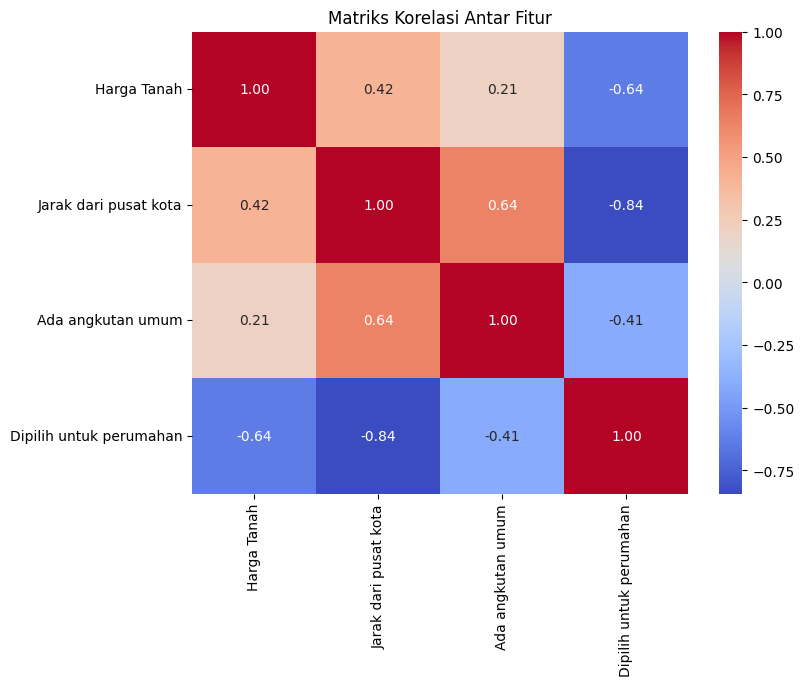

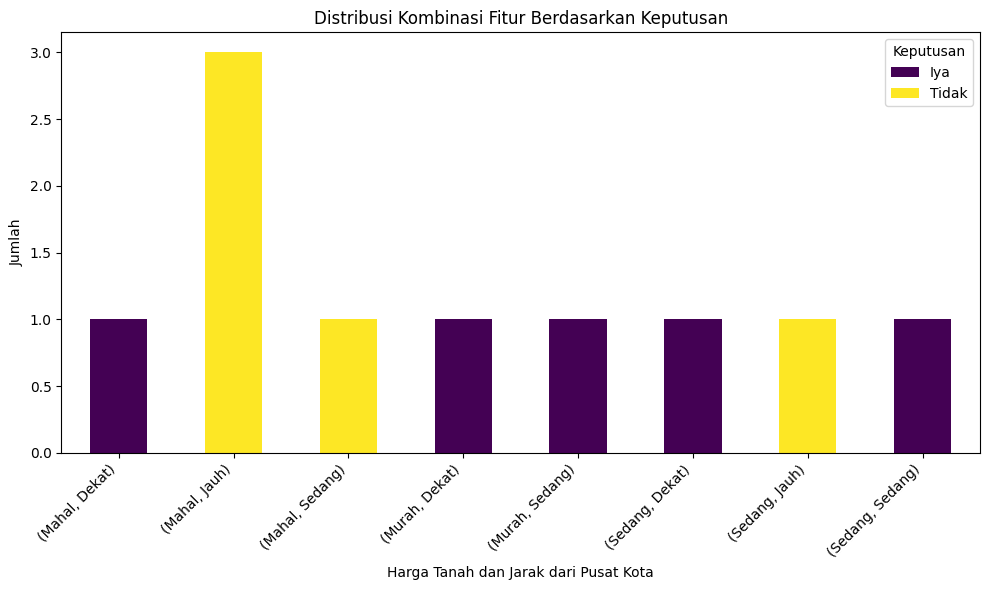

In [16]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset berdasarkan gambar
data = {
    "Harga Tanah": ["Murah", "Sedang", "Mahal", "Mahal", "Mahal", "Mahal", "Sedang", "Murah", "Mahal", "Sedang"],
    "Jarak dari pusat kota": ["Dekat", "Dekat", "Dekat", "Jauh", "Sedang", "Jauh", "Jauh", "Sedang", "Jauh", "Sedang"],
    "Ada angkutan umum": ["Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Ada", "Ada", "Tidak", "Ada", "Ada"],
    "Dipilih untuk perumahan": ["Iya", "Iya", "Iya", "Tidak", "Tidak", "Tidak", "Tidak", "Iya", "Tidak", "Iya"]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Konversi kolom kategorikal ke numerik
encoding_map = {
    "Murah": 1, "Sedang": 2, "Mahal": 3,
    "Dekat": 1, "Sedang": 2, "Jauh": 3,
    "Tidak": 0, "Ada": 1, "Iya": 1
}
df_encoded = df.replace(encoding_map)

# --- Visualisasi 1: Matriks Korelasi Antar Fitur ---
corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

# --- Visualisasi 2: Distribusi Kombinasi Fitur dengan Stacked Bar Chart ---
comb_data = df.groupby(["Harga Tanah", "Jarak dari pusat kota", "Dipilih untuk perumahan"]).size().unstack(fill_value=0)
comb_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Distribusi Kombinasi Fitur Berdasarkan Keputusan")
plt.xlabel("Harga Tanah dan Jarak dari Pusat Kota")
plt.ylabel("Jumlah")
plt.legend(title="Keputusan")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

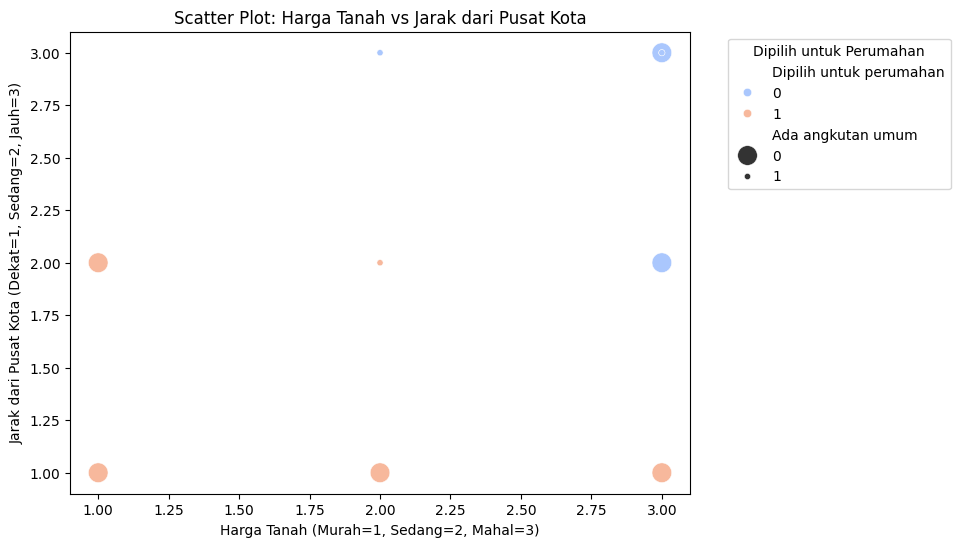

<ipython-input-17-2815da450309>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Dipilih untuk perumahan", palette="viridis")


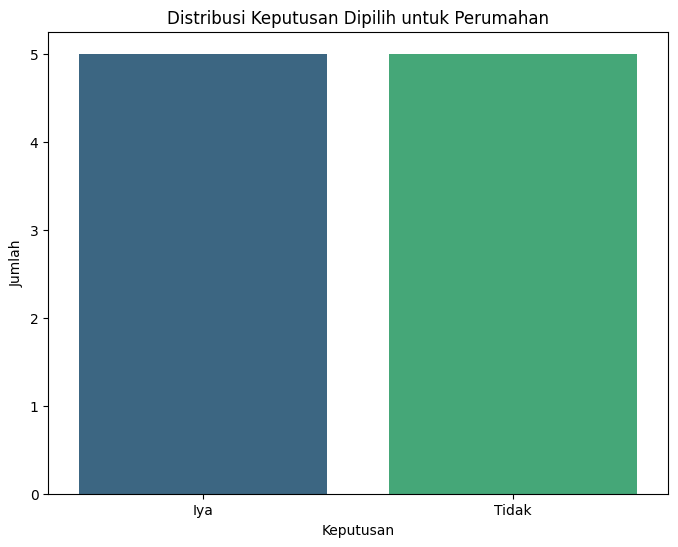

In [17]:
# --- Visualisasi 3: Scatter Plot untuk Memahami Pola Antar Fitur --- #
plt.figure(figsize=(8, 6))
scatter_data = df_encoded.copy()
sns.scatterplot(
    data=scatter_data,
    x="Harga Tanah",
    y="Jarak dari pusat kota",
    hue="Dipilih untuk perumahan",
    size="Ada angkutan umum",
    sizes=(20, 200),
    palette="coolwarm"
)
plt.title("Scatter Plot: Harga Tanah vs Jarak dari Pusat Kota")
plt.xlabel("Harga Tanah (Murah=1, Sedang=2, Mahal=3)")
plt.ylabel("Jarak dari Pusat Kota (Dekat=1, Sedang=2, Jauh=3)")
plt.legend(title="Dipilih untuk Perumahan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Visualisasi 4: Countplot untuk Distribusi Dipilih vs Tidak Dipilih --- #
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Dipilih untuk perumahan", palette="viridis")
plt.title("Distribusi Keputusan Dipilih untuk Perumahan")
plt.xlabel("Keputusan")
plt.ylabel("Jumlah")
plt.show()



# **FURTHER ADDITIONAL**

In [14]:
from sklearn.model_selection import train_test_split
from collections import defaultdict

# Fungsi evaluasi dengan split data
def evaluate_with_split(X, y, train_size, test_size):
    # Membagi data menjadi training dan testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, test_size=test_size, random_state=42
    )

    # Menghitung probabilitas prior dan likelihood
    train_prior_probs = y_train.value_counts(normalize=True)
    train_feature_probs = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
    for feature in X_train.columns:
        for value in X_train[feature].unique():
            for class_value in y_train.unique():
                num = len(X_train[(X_train[feature] == value) & (y_train == class_value)])
                den = y_train.value_counts()[class_value]
                train_feature_probs[feature][value][class_value] = num / den if den != 0 else 0

    # Prediksi pada data testing
    def predict_row(row):
        posterior_probs = calculate_posterior(row, train_prior_probs, train_feature_probs)
        return max(posterior_probs, key=posterior_probs.get)

    y_pred = X_test.apply(predict_row, axis=1)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return accuracy, report

In [15]:
# Fungsi untuk menghitung prior dan likelihood
def calculate_probabilities(X_train, y_train):
    prior_probs = y_train.value_counts(normalize=True)
    feature_probs = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
    for feature in X_train.columns:
        for value in X_train[feature].unique():
            for class_value in y_train.unique():
                num = len(X_train[(X_train[feature] == value) & (y_train == class_value)]) + 1
                den = y_train.value_counts()[class_value] + len(X_train[feature].unique())
                feature_probs[feature][value][class_value] = num / den if den != 0 else 0
    return prior_probs, feature_probs

# Fungsi evaluasi dengan split data
def evaluate_with_split(X, y, train_size, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, test_size=test_size, random_state=42
    )

    # Hitung prior dan likelihood
    prior_probs, feature_probs = calculate_probabilities(X_train, y_train)

    # Prediksi pada data testing
    def predict_row(row):
        posterior_probs = calculate_posterior(row, prior_probs, feature_probs)
        return max(posterior_probs, key=posterior_probs.get)

    y_pred = X_test.apply(predict_row, axis=1)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return accuracy, report, prior_probs, feature_probs

# Fungsi untuk memprediksi sampel
def predict(samples, prior_probs, feature_probs, class_labels):
    for i, sample in enumerate(samples, 1):
        posterior_probs = calculate_posterior(sample, prior_probs, feature_probs)
        print(f"\nPrediksi untuk Sampel {i}:")
        for class_value, posterior in posterior_probs.items():
            print(f"P(Kelas={class_labels[class_value]} | Data) = {posterior:.4f}")
        predicted_class = max(posterior_probs, key=posterior_probs.get)
        print(f"Kelas yang diprediksi: {class_labels[predicted_class]}")

# Input dataset
encoded_df = pd.DataFrame({
    'Harga Tanah': [1, 0, 2, 1, 0],
    'Jarak dari pusat kota': [0, 1, 2, 0, 1],
    'Ada angkutan umum': [1, 0, 1, 0, 1],
    'Dipilih untuk perumahan': [1, 0, 1, 1, 0]
})

X = encoded_df.drop(columns='Dipilih untuk perumahan')
y = encoded_df['Dipilih untuk perumahan']

# Evaluasi dengan 80% Training, 20% Testing
accuracy_80, report_80, prior_probs_80, feature_probs_80 = evaluate_with_split(X, y, train_size=0.8, test_size=0.2)
results = {"80% Training, 20% Testing": {"accuracy": accuracy_80, "report": report_80}}

# Tampilkan hasil evaluasi
print(f"\nHasil evaluasi dengan 80% Training dan 20% Testing:")
print(f"Akurasi: {accuracy_80:.2f}")
print(f"Laporan Klasifikasi:")
print(report_80)

# Daftar sampel data baru untuk pengujian
sample_data_list = [
    pd.Series({'Harga Tanah': 1, 'Jarak dari pusat kota': 1, 'Ada angkutan umum': 1}),
    pd.Series({'Harga Tanah': 0, 'Jarak dari pusat kota': 0, 'Ada angkutan umum': 0}),
    pd.Series({'Harga Tanah': 0, 'Jarak dari pusat kota': 1, 'Ada angkutan umum': 1})
]

# Pemetaan kelas
class_labels = {0: "Iya", 1: "Tidak"}

# Prediksi untuk sampel baru
print("\nPrediksi menggunakan model dengan 80% Training:")
predict(sample_data_list, prior_probs_80, feature_probs_80, class_labels)


Hasil evaluasi dengan 80% Training dan 20% Testing:
Akurasi: 1.00
Laporan Klasifikasi:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}}

Prediksi menggunakan model dengan 80% Training:

Prediksi untuk Sampel 1:
P(Kelas=Tidak | Data) = 0.0375
P(Kelas=Iya | Data) = 0.0208
Kelas yang diprediksi: Tidak

Prediksi untuk Sampel 2:
P(Kelas=Tidak | Data) = 0.0250
P(Kelas=Iya | Data) = 0.0104
Kelas yang diprediksi: Tidak

Prediksi untuk Sampel 3:
P(Kelas=Tidak | Data) = 0.0125
P(Kelas=Iya | Data) = 0.0417
Kelas yang diprediksi: Iya


## ***REMINDER FOR ME: MAKE SURE TO CLEAN CODE FOR FUTURE UNDERSTANDING***